In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

Generate a random (stable) IIR filter
--------------

In [109]:
B_len = np.random.randint(5, 10)
A_len = np.random.randint(5, 10)

B = np.random.randn(B_len)
A = np.random.randn(A_len)

In [110]:
# stable system

roots = np.random.rand((A_len - 1) // 2) * np.exp(np.random.rand((A_len - 1) // 2) * 2j * np.pi)
roots = np.hstack([roots, np.conj(roots)])
if A_len % 2 == 0:
    roots = np.hstack([roots, np.random.rand(1) * 2 - 1])
A = np.poly(roots)

In [111]:
stable = (np.abs(np.roots(A)) < 1).all()
stable

True

In [359]:
N = 10000

In [229]:
def iir_filter(x, B, A, N, y=None):
    if y is None:
        out = np.zeros(N)
        start = 0
    else:
        start = len(y)
        out = np.zeros(N + start)
        out[:start] = y
    
    for i in range(start, N + start):
        o = 0

        for j in range(max(0, i - len(x) + 1), min(i + 1, len(B))):
            o += B[j] * x[i - j]

        for j in range(1, min(i + 1, len(A))):
            o -= A[j] * out[i - j]

        out[i] = o / A[0]
        
    return out

In [157]:
out = iir_filter([1], B, A, N)

<IPython.core.display.Javascript object>


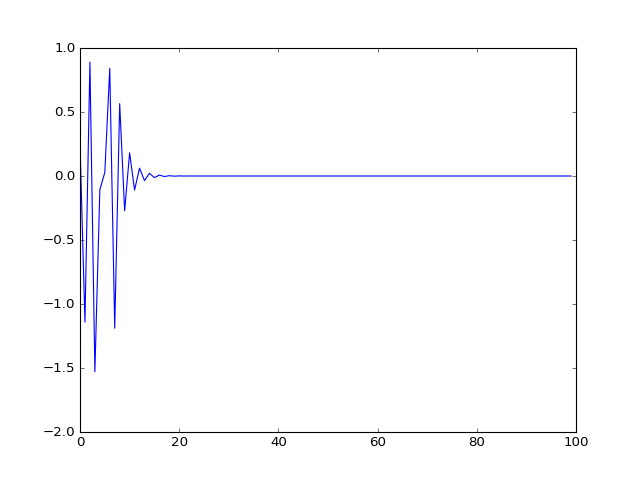

In [158]:
plt.figure()
plt.plot(out)

<IPython.core.display.Javascript object>


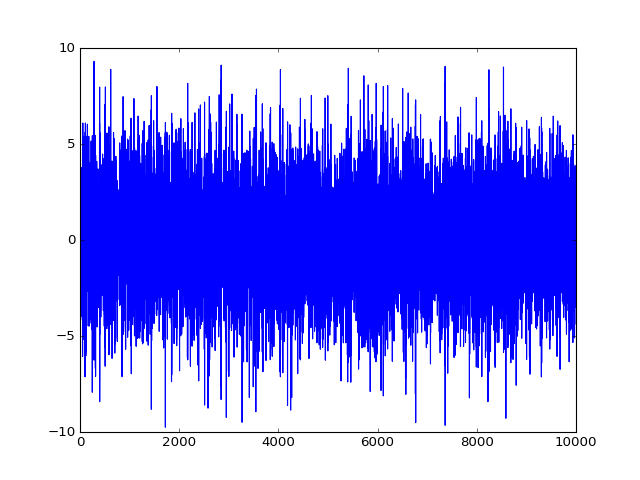

In [360]:
signal = np.random.randn(N)
out = iir_filter(signal, B, A, N)

plt.figure()
plt.plot(out)

Self Tuning Regulator
---------------------

### NLMS IIR System Identification

In [361]:
n = max(A_len, B_len)

In [380]:
mu = 1

In [381]:
omega = np.zeros(A_len + B_len - 1)#np.random.randn(A_len + B_len - 1)

In [382]:
errors = []

In [383]:
for n in range(max(A_len, B_len), N):
    z = np.hstack([out[n - 1:n - A_len:-1], signal[n:n - B_len:-1]])

    A_est = np.hstack([1, -omega[:A_len - 1]])
    B_est = omega[A_len - 1:]

    y_est = iir_filter(signal[n - max(A_len, B_len):n + 1], B_est, A_est, 1, out[n - max(A_len, B_len):n])

    e = out[n] - y_est[-1]

    errors.append(e)

    omega = omega + mu / np.dot(z, z) * e * z

<IPython.core.display.Javascript object>


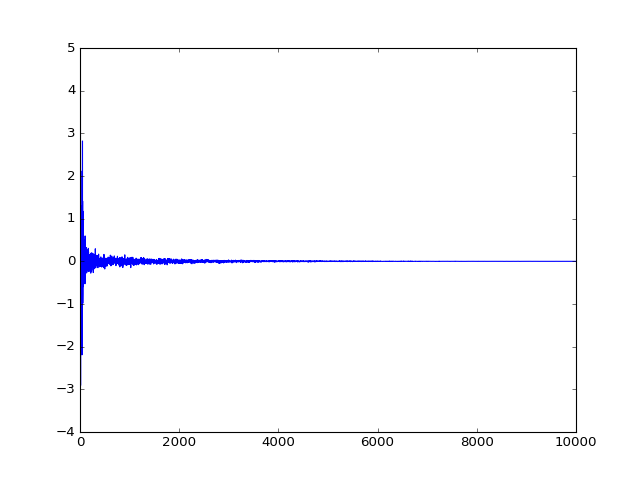

In [384]:
plt.figure()
plt.plot(errors)

In [385]:
A_est, A, B_est, B

(array([  1.00000000e+00,   5.26994759e-01,   7.16818792e-02,
          6.98852859e-02,   5.01352734e-03,   1.08887005e-04]),
 array([  1.00000000e+00,   5.27236470e-01,   7.19974106e-02,
          7.01414357e-02,   5.13632245e-03,   1.41423189e-04]),
 array([ 0.25276199, -1.00820647,  0.30626911, -1.12451222, -0.92841738,
        -0.08237035,  0.7452837 , -0.75878047]),
 array([ 0.25273927, -1.00816891,  0.30612243, -1.12463331, -0.92871489,
        -0.08284164,  0.74492588, -0.75879236]))